# **Q1**

#i) Obtain the least squares solution wML to the regression problem using the closed form expression

In [ ]:
from matplotlib import pyplot as plt 
import pandas as pd
import numpy as np

df = np.loadtxt('/content/A2Data_train.csv', delimiter=',')

data = df
x = data[:,0:100]
y = data[:, 100]
print(x)
print(y)
print(x.shape)
print(y.shape)

[[0.58351  0.37939  0.83975  ... 0.95855  0.84948  0.92369 ]
 [0.86622  0.45135  0.93479  ... 0.32068  0.41419  0.83023 ]
 [0.39142  0.91995  0.13873  ... 0.62863  0.29479  0.5428  ]
 ...
 [0.89209  0.99753  0.88043  ... 0.82772  0.33115  0.92875 ]
 [0.70381  0.42294  0.25923  ... 0.82246  0.4981   0.060471]
 [0.36578  0.028173 0.021793 ... 0.87269  0.015329 0.99026 ]]
[1.9741 2.3354 2.2053 ... 2.0964 1.8405 2.7624]
(10000, 100)
(10000,)


In [ ]:
df2 = np.loadtxt('/content/A2Data_test.csv', delimiter=',')

data2 = df2
x_test = data2[:,0:100]
y_test = data2[:, 100]
print(x_test.shape)
print(y_test.shape)

(500, 100)
(500,)


# i) closed form solution for $W=argmin ||XW-Y||^{2}$ , is $W=(X^{T}X)^{-1}X^{T}Y$

In [ ]:
# Compute the least squares solution using the closed form expression
w = np.dot(np.linalg.inv(np.dot(x.T, x)), np.dot(x.T, y))


# ii) Code the gradient descent algorithm with suitable step size to solve the least squares algorithms

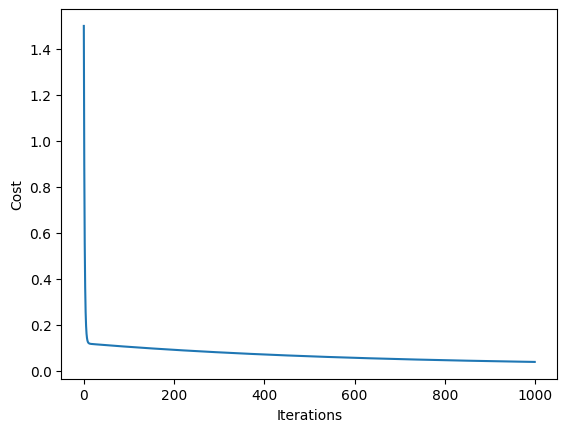

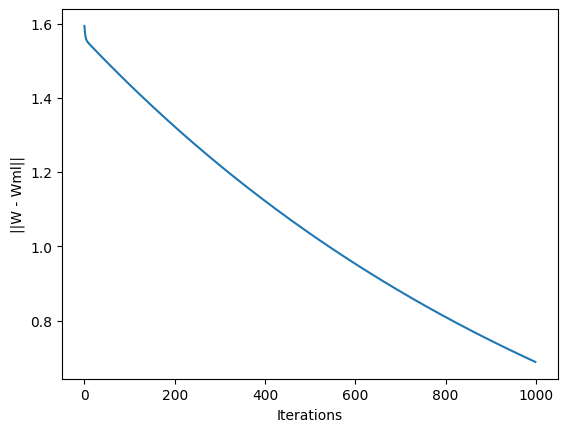

In [ ]:
import matplotlib.pyplot as plt
# Compute the least squares solution using the closed form expression
wML = np.dot(np.linalg.inv(np.dot(x.T, x)), np.dot(x.T, y))
# Define the cost function and its gradient
def mse_cost(x_new, y, w):
    m = x.shape[0]
    y_pred = np.dot(x, w)
    return np.sum((y_pred - y)**2) / (2*m)

def mse_gradient(x, y, w):
    m = x.shape[0]
    y_pred = np.dot(x, w)
    return np.dot(x.T, np.dot(x,w) - y) / m
    
def w_diff(w, w_new):
    return np.linalg.norm(w_new - w)
# Initialize the weights to zero
# we can also initalize the weights to random numbers so that all weught are not forced to have equal vlaues.
w_new = np.zeros(x.shape[1])

# Define the learning rate and number of iterations
alpha = 0.01
num_iterations = 1000

# Initialize an array to store the cost at each iteration
cost_history = np.zeros(num_iterations)
diff_history = np.zeros(num_iterations)
# Perform gradient descent
for i in range(num_iterations):
    w_new = w_new - alpha * mse_gradient(x, y, w_new)
    cost_history[i] = mse_cost(x, y, w_new)
    diff_history[i] = w_diff(wML,w_new)

# Plot the cost as a function of iterations
plt.plot(cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()
# Plot the diffetence between Wml and w_new function of iterations
plt.plot(diff_history)
plt.xlabel('Iterations')
plt.ylabel('||W - Wml||')
plt.show()


# iii) Code the stochastic gradient descent algorithm using batch size of 100

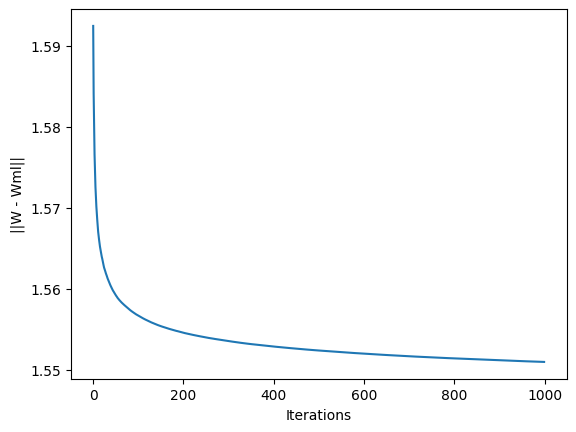

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the cost function and its gradient
def mse_cost(x, y, w):
    m = x.shape[0]
    y_pred = np.dot(x, w)
    return np.sum((y_pred - y)**2) / (2*m)

def mse_gradient(X_batch, y_batch, w):
    m = X_batch.shape[0]
    y_pred = np.dot(X_batch, w)
    return np.dot(X_batch.T, y_pred - y_batch) / m

def w_diff(w, w_new):
    return np.linalg.norm(w_new - w)

X = x
y = y
# Compute the least squares solution using the closed form expression
wML = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))

# Initialize the weights to zero
w_new = np.zeros(X.shape[1])

# Define the learning rate and number of iterations
alpha = 0.01
num_iterations = 1000

# Initialize an array to store the cost at each iteration
cost_history = np.zeros(num_iterations)

# Perform stochastic gradient descent with a batch size of 100
sum =0
n = 0
for i in range(num_iterations):
    # Randomly shuffle the data
    idx = np.random.permutation(X.shape[0])
    X_shuffled = X[idx]
    y_shuffled = y[idx]
    n = n+1
    X_batch = X_shuffled[1:1+100]
    y_batch = y_shuffled[1:1+100]
    sum = sum + w_new - alpha * mse_gradient(X_batch, y_batch, w_new)
    w_new = (sum)/n
    cost_history[i] = mse_cost(X, y, w_new)
    diff_history[i] = w_diff(wML,w_new)

# Plot the diffetence between Wml and w_new function of iterations
plt.plot(diff_history)
plt.xlabel('Iterations')
plt.ylabel('||W - Wml||')
plt.show()
